In [2]:
library(tidyverse)
library(ggpubr)
library(yaml)
library(patchwork)
#library(Seurat)
#library(ggvenn)

#read config
config <- read_yaml(file = "../Dip_C_snakemake/config.yaml")

#Common
Raw <- read_table2("../stat/raw.fq.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X2 = X2/4*300/1000000000,X1 = strsplit(X1,split = "/")[[1]][3],X1 = strsplit(X1,split = "_")[[1]][1])

raw_pairs <- read_table2("../stat/raw.pairs.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][3])
pairs_dedup <- read_table2("../stat/pairs.dedup.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][3])

pairs_c1 <- read_table2("../stat/pairs.c1.stat",col_names=F)%>% arrange(X1) %>%rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][5]) %>% mutate(X1 = str_replace(X1,".pairs.gz",""))
pairs_c12 <- read_table2("../stat/pairs.c12.stat",col_names=F)%>% arrange(X1) %>%rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][5]) %>% mutate(X1 = str_replace(X1,".pairs.gz",""))
inter_pairs_c12 <- read_table2(file = "../stat/inter.pairs.c12.stat",col_names = F) %>% arrange(X1) %>%rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][5]) %>% mutate(X1 = str_replace(X1,".pairs.gz",""))
yperx <- read_table2("../stat/yperx.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][2])
stat <- Raw %>% left_join(yperx,by="X1") %>% left_join(raw_pairs,by="X1") %>% left_join(pairs_dedup,by="X1") %>% 
    left_join(pairs_c1,by="X1") %>% left_join(pairs_c12,by="X1") %>% left_join(inter_pairs_c12,by="X1")

names(stat) <- c("cellname","Rawreads","yperx","raw_pairs","pairs_dedup","pairs_clean1","pairs_clean2","inter_pairs_clean2")


if(config$if_structure){
    rmsd <- read_table2("../stat/rmsd.info",col_names = F) %>% rowwise() %>% mutate(X1=str_split(X1,pattern = fixed("/")),cellname = X1[1], res = str_split(X1[3], fixed("."))[[1]][2],TOP3_RMSD = X5) %>% select(cellname,res,TOP3_RMSD) %>% spread(res,TOP3_RMSD) %>% arrange(cellname)
    stat <- stat %>% left_join(rmsd)
}

stat <- stat %>% mutate(pairsPerRead = raw_pairs/Rawreads/1000000000*300,
                        pairsValidRatio = pairs_clean2/raw_pairs,
                        interPairsRatio = inter_pairs_clean2/pairs_clean2) 
stat[is.na(stat)]<-0

Warning message in readLines(file, warn = readLines.warn):
“incomplete final line found on '../Dip_C_snakemake/config.yaml'”
Warning message:
“`read_table2()` was deprecated in readr 2.0.0.
ℹ Please use `read_table()` instead.”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = co

In [3]:
stat

cellname,Rawreads,yperx,raw_pairs,pairs_dedup,pairs_clean1,pairs_clean2,inter_pairs_clean2,pairsPerRead,pairsValidRatio,interPairsRatio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L3sc1,0.5350647,0,359980,224557,224078,202397,50946,0.2018335,0.5622451,0.2517132
L3sc2,0.1724070,0,151715,103263,103232,85084,8901,0.2639945,0.5608147,0.1046143
L3sc3,0.2187519,0,168121,110541,110490,93151,11011,0.2305639,0.5540712,0.1182059
L3sc4,0.3137916,0,218724,160385,160277,141827,19392,0.2091108,0.6484291,0.1367300
L3sc5,0.6456543,0,373010,234285,233510,216230,36637,0.1733172,0.5796896,0.1694353
L3sc6,1.1141265,0,684011,385348,384853,361637,74274,0.1841831,0.5287006,0.2053827
L3sc7,0.3118389,0,219535,164922,164728,140155,18141,0.2112004,0.6384176,0.1294353
L3sc8,0.7803738,0,552349,345119,344143,317913,63006,0.2123402,0.5755654,0.1981863
R2sc1,1.0025244,0,696351,388334,387975,361739,83802,0.2083793,0.5194780,0.2316643


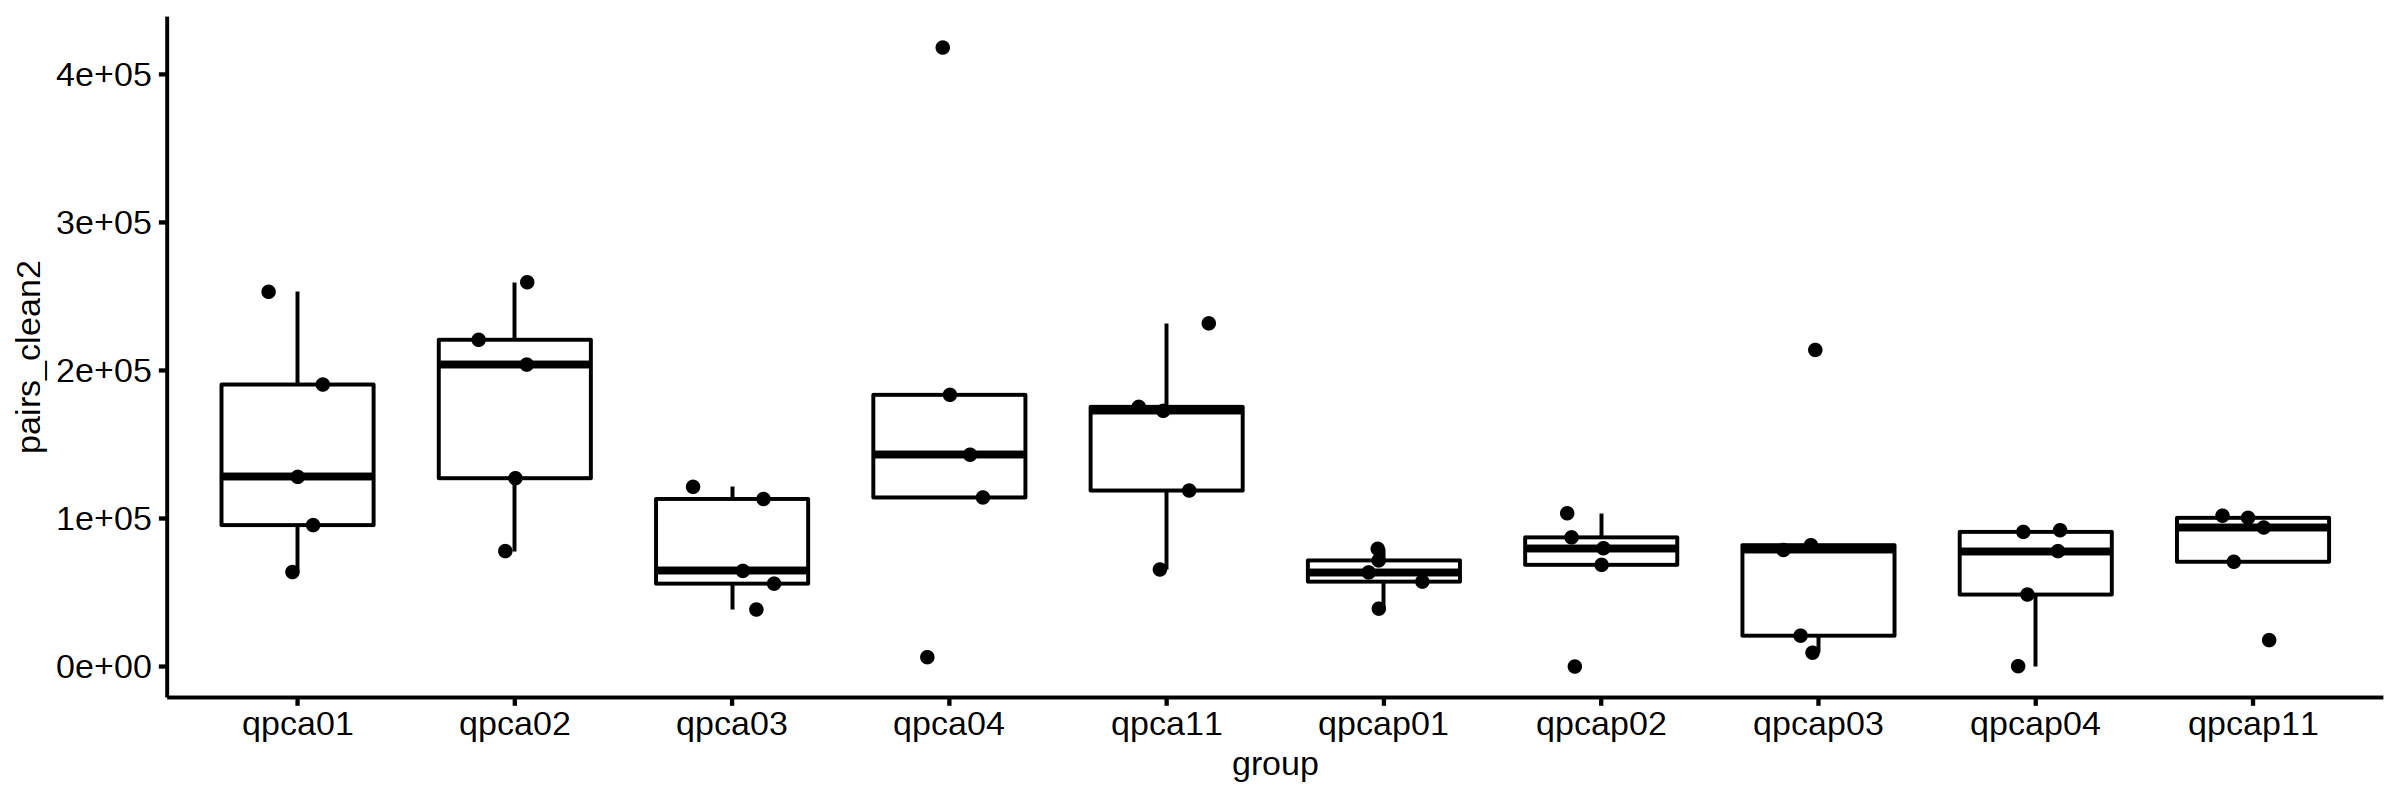

In [19]:
options(repr.plot.width = 12,repr.plot.height=4,repr.plot.res = 200)
stat %>% mutate(group = str_extract(cellname,pattern = "[a-z]+[0-9]{2}")) %>% ggboxplot(x="group",y="pairs_clean2",add = "jitter")

In [25]:
stat %>% mutate(group = str_extract(cellname,pattern = "[a-z]+[0-9]{2}")) %>% group_by(group) %>% summarise(pairs_dedup = mean(pairs_dedup))

group,pairs_dedup
<chr>,<dbl>
qpca01,166848.4
qpca02,208354.2
qpca03,138987.2
qpca04,200041.8
qpca11,182698.4
qpcap01,89949.2
qpcap02,93508.6
qpcap03,127587.4
qpcap04,81200.2
